# K-Means

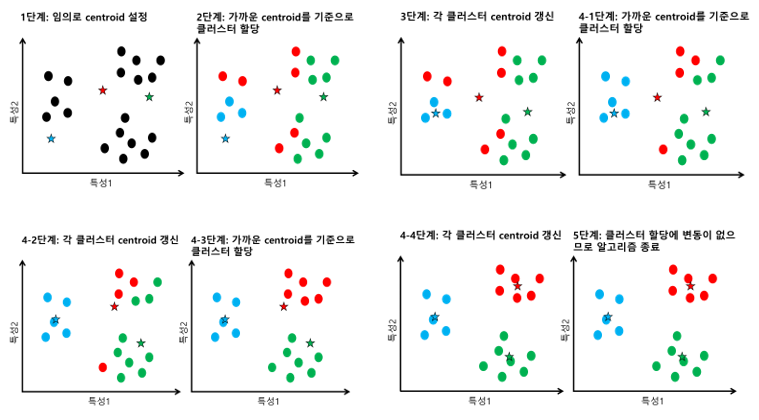

1. K 값설정
2. 지정된 K개 만큼의 랜덤 좌표 설정
3. 모든 데이터로부터 가장 가까운 중심점 선택
4. 데이터들의 평균 중심으로 중심점 이동
5. 중심점이 더 이상 이동되지 않을 때까지 반복

3~5 번 반복

### Random Initialization Trap => K-means++

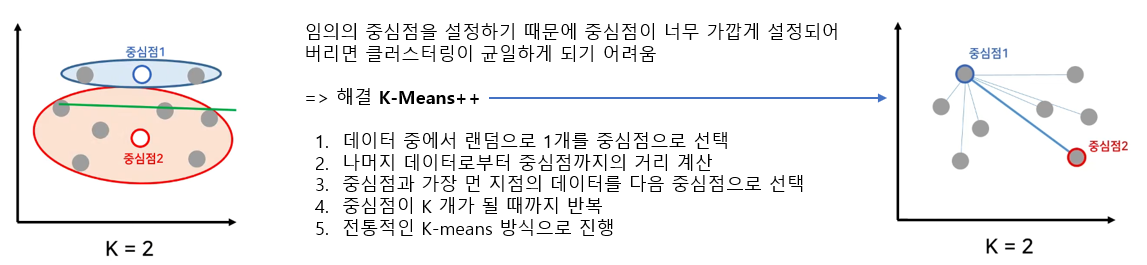

### Optimal K(최적의 K) : Elbow Method

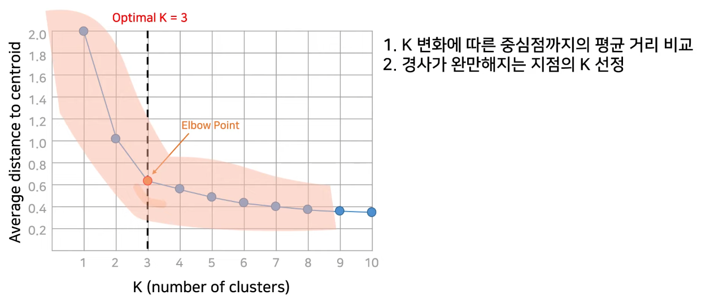

- 데이터를 K 개의 클러스터(그룹)로 군집화하는 알고리즘, 각 데이터로부터 이들이 속한 클러스터의 중심점까지 평균 거리를 계산

- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
        - PCA 로 치환 감소 적용
    - 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집을 선택해야 할 지 가이드하기 어려움

In [41]:
import os
os.environ['OMT_NUM_THREADS'] = '1'

- K-means 를 윈도우즈에서 실행 시 memory leak 현상으로 인해 에러 발생
 - os.environ['OPT_NUM_THREADS'] = '1' >> 작업을 통해 에러 방지

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv("./dataset/KMeansData.csv")
dataset

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79
...,...,...
95,6.21,56
96,7.76,84
97,5.22,87
98,6.65,13


In [25]:
# ndarray 타입으로 2차원 배열 반환
X = dataset.iloc[:,:].values

In [26]:
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화

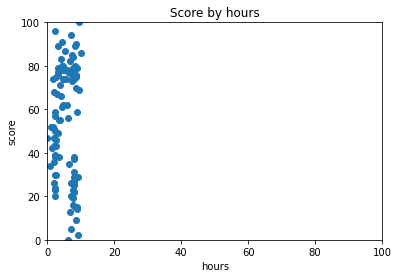

In [27]:
plt.scatter(X[:, 0], X[:,1])
plt.title("Score by hours")
plt.xlabel("hours")
plt.xlim(0, 100)
plt.ylabel("score")
plt.ylim(0, 100)
plt.show()

### Feature Scaling

- 개별 feature 를 평균이 0 이고 분산이 1 인 형태로 변환

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### K-Means ( K-평균 )

In [30]:
from sklearn.cluster import KMeans

In [32]:
KMeans()

KMeans()


KMeans(
    
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
    
)


n_cluster : 군집화할 개수 ( 가장 중요 )

init='k-means++' : 중심점 설정 방식

max_iter=300 : 300번 반복 (중심점 이동과 관련이 있기 때문에 300번을 다 안돌 수 있음)

C:\Users\ycr50\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ycr50\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ycr50\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ycr50\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

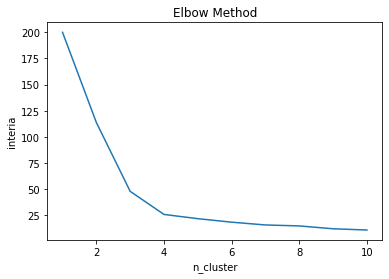

In [35]:
interia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    interia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), interia_list)
plt.title("Elbow Method")
plt.xlabel("n_cluster")
plt.ylabel("interia")
plt.show()

In [39]:
K = 4

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
# kmeans.fit(X)

y_kmeans = kmeans.fit_predict(X)

C:\Users\ycr50\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
kmeans.labels_ # Cluster 4개 확인

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [44]:
# 클러스터 중심점 좌표

centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

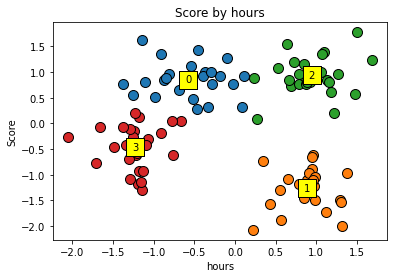

In [47]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors='black', color='yellow', marker="s")
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### 스케일릭 원복

In [48]:
X_ori = sc.inverse_transform(X)

In [50]:
centers_ori = sc.inverse_transform(centers)

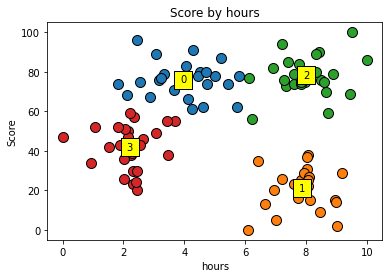

In [52]:
for cluster in range(K):
    plt.scatter(X_ori[y_kmeans == cluster, 0], X_ori[y_kmeans == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers_ori[cluster, 0], centers_ori[cluster, 1], s=300, edgecolors='black', color='yellow', marker="s")
    plt.text(centers_ori[cluster, 0], centers_ori[cluster, 1], cluster, va='center', ha='center')
    
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()